<a href="https://colab.research.google.com/github/mrbane10/Computer_Vision/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
print(f'shape of X_train: {X_train.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of X_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)


In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [23]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    print(y[index])
    plt.xlabel(classes[y[index][0]])

[6]


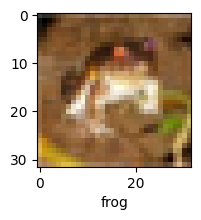

In [24]:
plot_sample(X_train,y_train,0)

In [25]:
#normalising the image
X_train=X_train/255.0
x_test=X_test/255.0

In [32]:
# using a simple ANN for image classification
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')

])

In [33]:
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.7422 - accuracy: 0.3857
Epoch 2/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6052 - accuracy: 0.4334
Epoch 3/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5313 - accuracy: 0.4590
Epoch 4/5
1563/1563 [==============================] - 27s 18ms/step - loss: 1.4710 - accuracy: 0.4811
Epoch 5/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4229 - accuracy: 0.4991


In [36]:
from sklearn.metrics import classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_predict_classes=[np.argmax(i) for i in y_pred]
print(classification_report(y_test,y_predict_classes))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.41      0.79      0.54      1000
           2       0.46      0.22      0.30      1000
           3       0.37      0.25      0.30      1000
           4       0.59      0.14      0.22      1000
           5       0.33      0.40      0.36      1000
           6       0.69      0.28      0.40      1000
           7       0.36      0.72      0.48      1000
           8       0.75      0.35      0.48      1000
           9       0.42      0.63      0.50      1000

    accuracy                           0.44     10000
   macro avg       0.49      0.44      0.41     10000
weighted avg       0.49      0.44      0.41     10000



In [56]:
# using CNN for image classfication
cnn=models.Sequential(
    [
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
    ]
)

In [57]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4647 - accuracy: 0.4768
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1002 - accuracy: 0.6147
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9603 - accuracy: 0.6670
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8751 - accuracy: 0.6959
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8019 - accuracy: 0.7234
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7432 - accuracy: 0.7425
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6914 - accuracy: 0.7610
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6493 - accuracy: 0.7746
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6075 - accuracy: 0.7889
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 

In [59]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 214.4384 - accuracy: 0.4773


[214.43844604492188, 0.4772999882698059]

In [44]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [45]:
y_pred[0:10]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.9999994e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.5733264e-18,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

In [46]:
y_classes=[np.argmax(i) for i in y_pred]

[6]


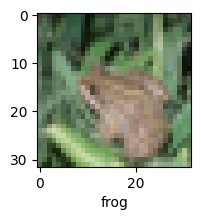

In [54]:
plot_sample(X_test,y_test,4)

In [55]:
classes[y_classes[4]]

'frog'